# PAL case study

### Notebook helper function for pretty output

In [1]:
from IPython.display import Markdown, display


def print_md(markdown_printable):
    """Pretty render Markdown."""
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset, load_model, load_parameters
from glotaran.project.scheme import Scheme

## Global Analysis

### Read data

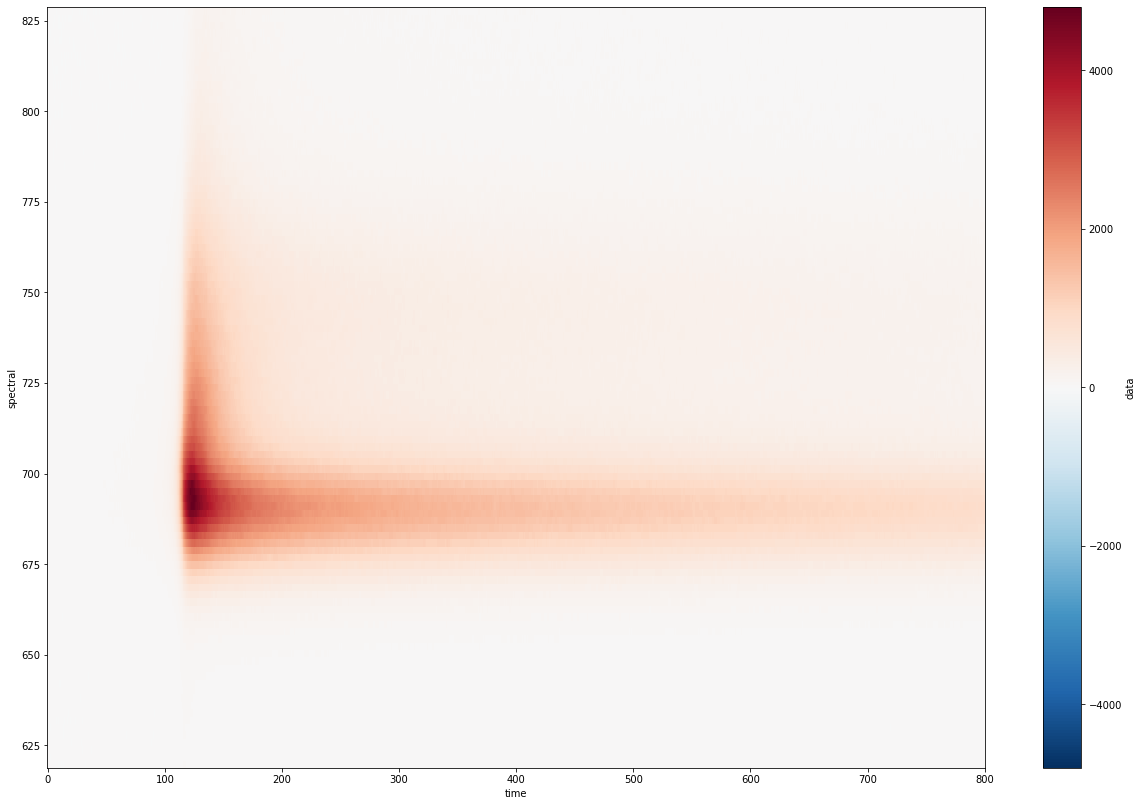

In [4]:
dataset = load_dataset("PAL_DCMU_80uM_WL_SF_700_ma_tr2_gain50_100uW_590nmfilter_21C_400nm_AV_bc_sh_sel_620_830.ascii")
dataset.data.plot(x="time")

### Load model and parameters

In [8]:
PAL_closed_global_model = load_model("models/PAL-closed-global-model.yml")
PAL_closed_global_parameters = load_parameters("models/PAL-closed-global-parameters.yml")
print_md(PAL_closed_global_model.validate(parameters=PAL_closed_global_parameters))

Your model is valid.

In [9]:
print_md(PAL_closed_global_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4']
  * *Parameters*: [input.1, input.0, input.0, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s2', 's1')*: kinetic.1
    * *('s3', 's2')*: kinetic.2
    * *('s4', 's3')*: kinetic.3
    * *('s4', 's4')*: kinetic.4
  

## Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf_common.center, irf_common.center]
  * *Width*: [irf_1.width, irf_2.width]
  * *Scale*: [irf_1.scale, irf_2.scale]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf_common.backsweep
  * *Center Dispersion*: []
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']

## Weights

* 
  * *Datasets*: ['dataset1']
  * *Global Interval*: [780, 1000]
  * *Value*: 0.3



### Create scheme and optimize it

In [10]:
PAL_closed_global_scheme = Scheme(PAL_closed_global_model, PAL_closed_global_parameters, {"dataset1": dataset}, non_negative_least_squares=True)
PAL_closed_global_result = optimize(PAL_closed_global_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.8224e+07                                    7.99e+10    
       1              2         1.5258e+07      4.30e+07       5.25e+00       4.45e+10    
       2              3         6.7733e+06      8.48e+06       3.35e+00       2.15e+09    
       3              4         6.7160e+06      5.72e+04       6.14e-01       5.16e+08    
       4              5         6.7135e+06      2.50e+03       2.05e-01       3.05e+07    
       5              6         6.7135e+06      2.91e+01       6.24e-02       1.62e+06    
       6              7         6.7135e+06      1.30e+00       2.22e-02       1.64e+05    
       7              8         6.7135e+06      1.20e-01       8.27e-03       1.99e+04    
       8              9         6.7135e+06      1.55e-02       3.14e-03       1.11e+03    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 5.8224e+07

In [11]:
PAL_closed_global_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 4, component: 4, from_species: 4, left_singular_value_index: 103, right_singular_value_index: 103, singular_value_index: 103, species: 4, spectral: 103, time: 1024, to_species: 4)
Coordinates:
  * time                                      (time) float64 0.0 ... 799.7
  * spectral                                  (spectral) float64 619.9 ... 827.8
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's4'
  * species                                   (species) <U2 's1' 's2' 's3' 's4'
    rate                                      (component) float64 -0.2236 ......
    lifetime                                  (component) float64 -4.473 ... ...
  * to_species                                (to_species) <U2 's1' ... 's4'
  * from_species                              (from_species) <U2 's1' ... 's4'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/26)
    data                                      (time, spectral) float64 2.25 ....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    weight                                    (time, spectral) float64 1.0 .....
    weighted_data                             (time, spectral) float64 2.25 ....
    ...                                        ...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 115.7
    irf_width                                 float64 4.001
    irf                                       (time) float64 0.005159 ... 6.4...
Attributes:
    root_mean_square_error:           12.20860517635257
    weighted_root_mean_square_error:  11.282888991842514

### Result plots

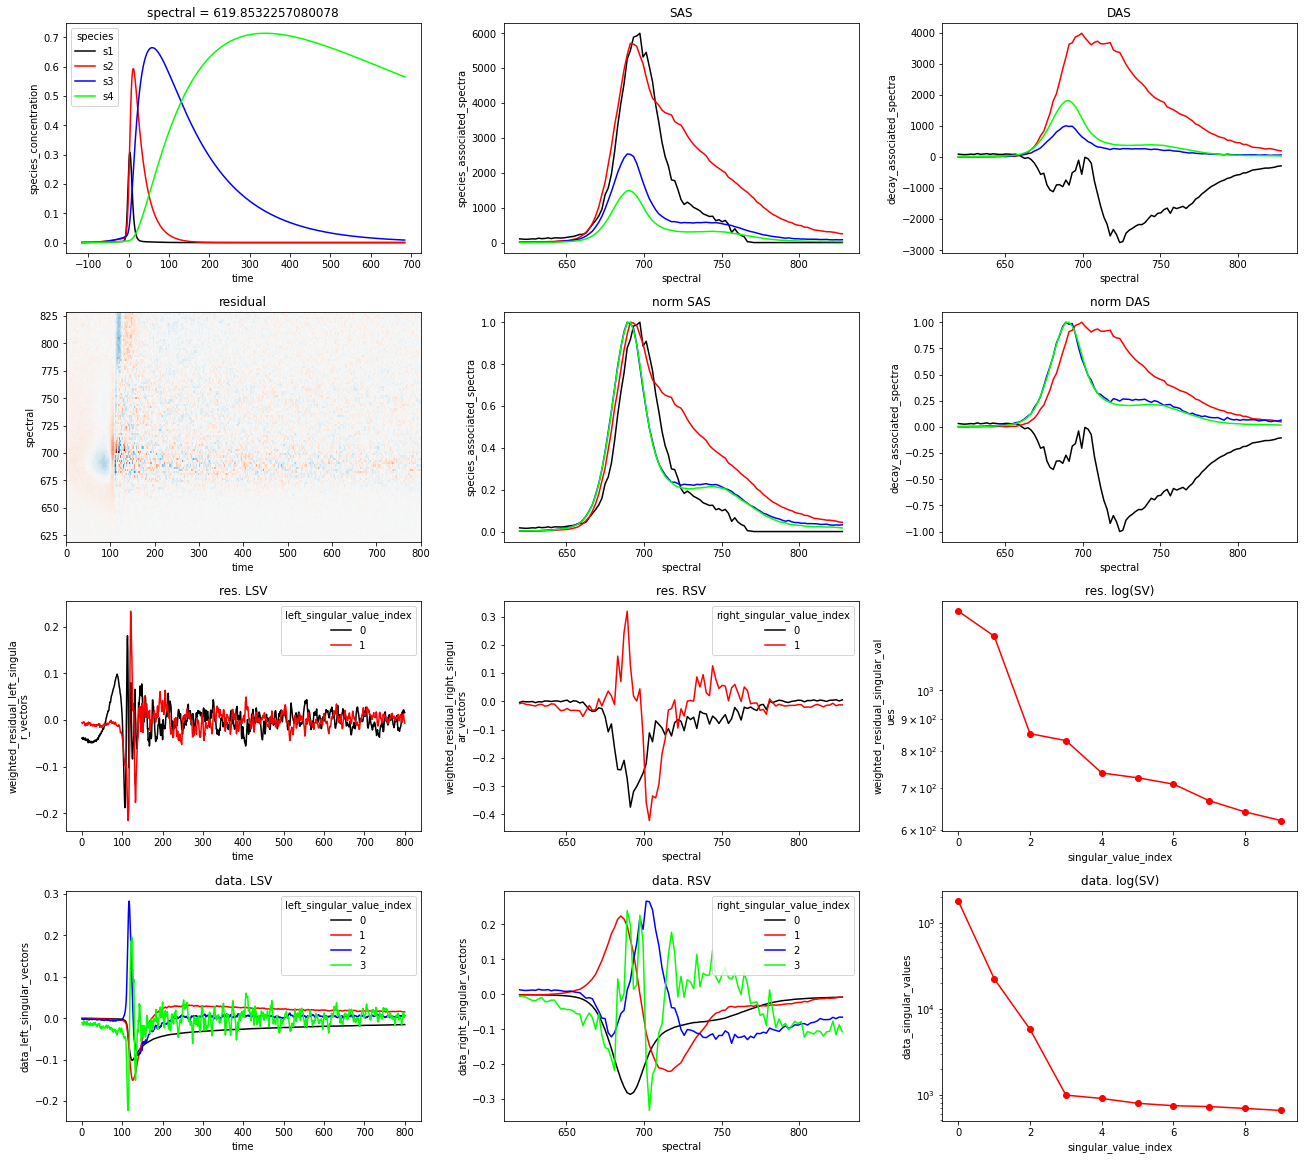

In [12]:
plot_overview(PAL_closed_global_result.data["dataset1"], linlog=False);

In [14]:
print_md(PAL_closed_global_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf_1__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | width     |   4.00149 | 0.000483624 |    -inf |     inf | True     | False            | None     |
    | scale     |   1       | 0           |    -inf |     inf | False    | False            | None     |

  * __irf_2__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | width     | 46.8805   | 0.021306    |    -inf |     inf | True     | False            | None     |
    | scale     |  0.108295 | 4.27138e-05 |    -inf |     inf | True     | False            | None     |

  * __irf_common__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | center    |   115.674 | 0.000678851 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13800     | 0           |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|-------------|---------|---------|----------|------------------|----------|
    |         1 | 0.223586   | 9.32022e-05 |    -inf |     inf | True     | False            | None     |
    |         2 | 0.0406779  | 6.66759e-06 |    -inf |     inf | True     | False            | None     |
    |         3 | 0.00731493 | 6.12508e-06 |    -inf |     inf | True     | False            | None     |
    |         4 | 0.00109865 | 4.34645e-07 |    -inf |     inf | True     | False            | None     |



## Target Analysis

### Load model and parameters

In [15]:
PAL_closed_target_model = load_model("models/PAL-closed-target-model.yml")
PAL_closed_target_parameters = load_parameters("models/PAL-closed-target-parameters.yml")
print_md(PAL_closed_target_model.validate(parameters=PAL_closed_target_parameters))

Your model is valid.

In [23]:
compartments = PAL_closed_target_model.initial_concentration["input1"].compartments
print_md(PAL_closed_target_model.megacomplex["mc1"].full_k_matrix(PAL_closed_target_model).matrix_as_markdown(compartments).replace("0.0000e+00",""))

| compartment | s1 | s2 | s3 | s4 | s5
|---|---|---|---|---|---
| s1 | kinetic.2 | kinetic.1_1 |  |  | |
| s2 | kinetic.1 | kinetic.2 |  |  | |
| s3 | kinetic.3 |  | kinetic.2 |  | |
| s4 |  |  |  | kinetic.2 | kinetic.4_2|
| s5 |  |  |  | kinetic.4 | kinetic.5|


In [18]:
print_md(PAL_closed_target_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5']
  * *Parameters*: [input.1, input.0, input.0, input.4, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.2
    * *('s1', 's2')*: kinetic.1_1
    * *('s2', 's1')*: kinetic.1
    * *('s2', 's2')*: kinetic.2
    * *('s3', 's1')*: kinetic.3
    * *('s3', 's3')*: kinetic.2
  
* **km_open**:
  * *Label*: km_open
  * *Matrix*: 
    * *('s4', 's4')*: kinetic.2
    * *('s4', 's5')*: kinetic.4_2
    * *('s5', 's4')*: kinetic.4
    * *('s5', 's5')*: kinetic.5
  

## Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf_common.center, irf_common.center]
  * *Width*: [irf_1.width, irf_2.width]
  * *Scale*: [irf_1.scale, irf_2.scale]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf_common.backsweep
  * *Center Dispersion*: []
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1', 'km_open']

## Weights

* 
  * *Datasets*: ['dataset1']
  * *Global Interval*: [780, 1000]
  * *Value*: 0.3

## Spectral Constraints

* **zero**:
  * *Type*: zero
  * *Compartment*: s2
  * *Interval*: [[1, 690]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s3
  * *Interval*: [[1, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s5
  * *Interval*: [[1, 1000]]



### Create scheme and optimize it

In [19]:
PAL_closed_target_scheme = Scheme(PAL_closed_target_model, PAL_closed_target_parameters, {"dataset1": dataset}, non_negative_least_squares=True)
PAL_closed_target_result = optimize(PAL_closed_target_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7937e+07                                    1.26e+10    
       1              2         9.2857e+06      8.65e+06       1.12e+01       4.30e+09    
       2              3         8.7735e+06      5.12e+05       1.47e+01       5.14e+07    
       3              4         8.7462e+06      2.74e+04       8.52e+00       5.22e+07    
       4              5         8.7448e+06      1.39e+03       2.21e+00       2.85e+06    
       5              6         8.7447e+06      3.25e+01       2.12e-01       8.28e+05    
       6              7         8.7447e+06      3.74e+00       3.97e-03       3.78e+05    
       7              8         8.7447e+06      6.87e-01       4.18e-03       1.67e+05    
       8              9         8.7447e+06      1.29e-01       2.20e-03       7.29e+04    
       9             10         8.7447e+06      2.42e-02       9.87e-04       3.17e+04    

In [20]:
PAL_closed_target_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 5, component: 5, from_species: 5, left_singular_value_index: 103, right_singular_value_index: 103, singular_value_index: 103, species: 5, spectral: 103, time: 1024, to_species: 5)
Coordinates:
  * time                                      (time) float64 0.0 ... 799.7
  * spectral                                  (spectral) float64 619.9 ... 827.8
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's5'
  * species                                   (species) <U2 's1' 's2' ... 's5'
    rate                                      (component) float64 -0.2569 ......
    lifetime                                  (component) float64 -3.893 ... ...
  * to_species                                (to_species) <U2 's1' ... 's5'
  * from_species                              (from_species) <U2 's1' ... 's5'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/26)
    data                                      (time, spectral) float64 2.25 ....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    weight                                    (time, spectral) float64 1.0 .....
    weighted_data                             (time, spectral) float64 2.25 ....
    ...                                        ...
    a_matrix                                  (component, species) float64 0....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 116.7
    irf_width                                 float64 4.67
    irf                                       (time) float64 0.03083 ... 1.21...
Attributes:
    root_mean_square_error:           13.753402988871887
    weighted_root_mean_square_error:  12.87714551462424

### Result plots

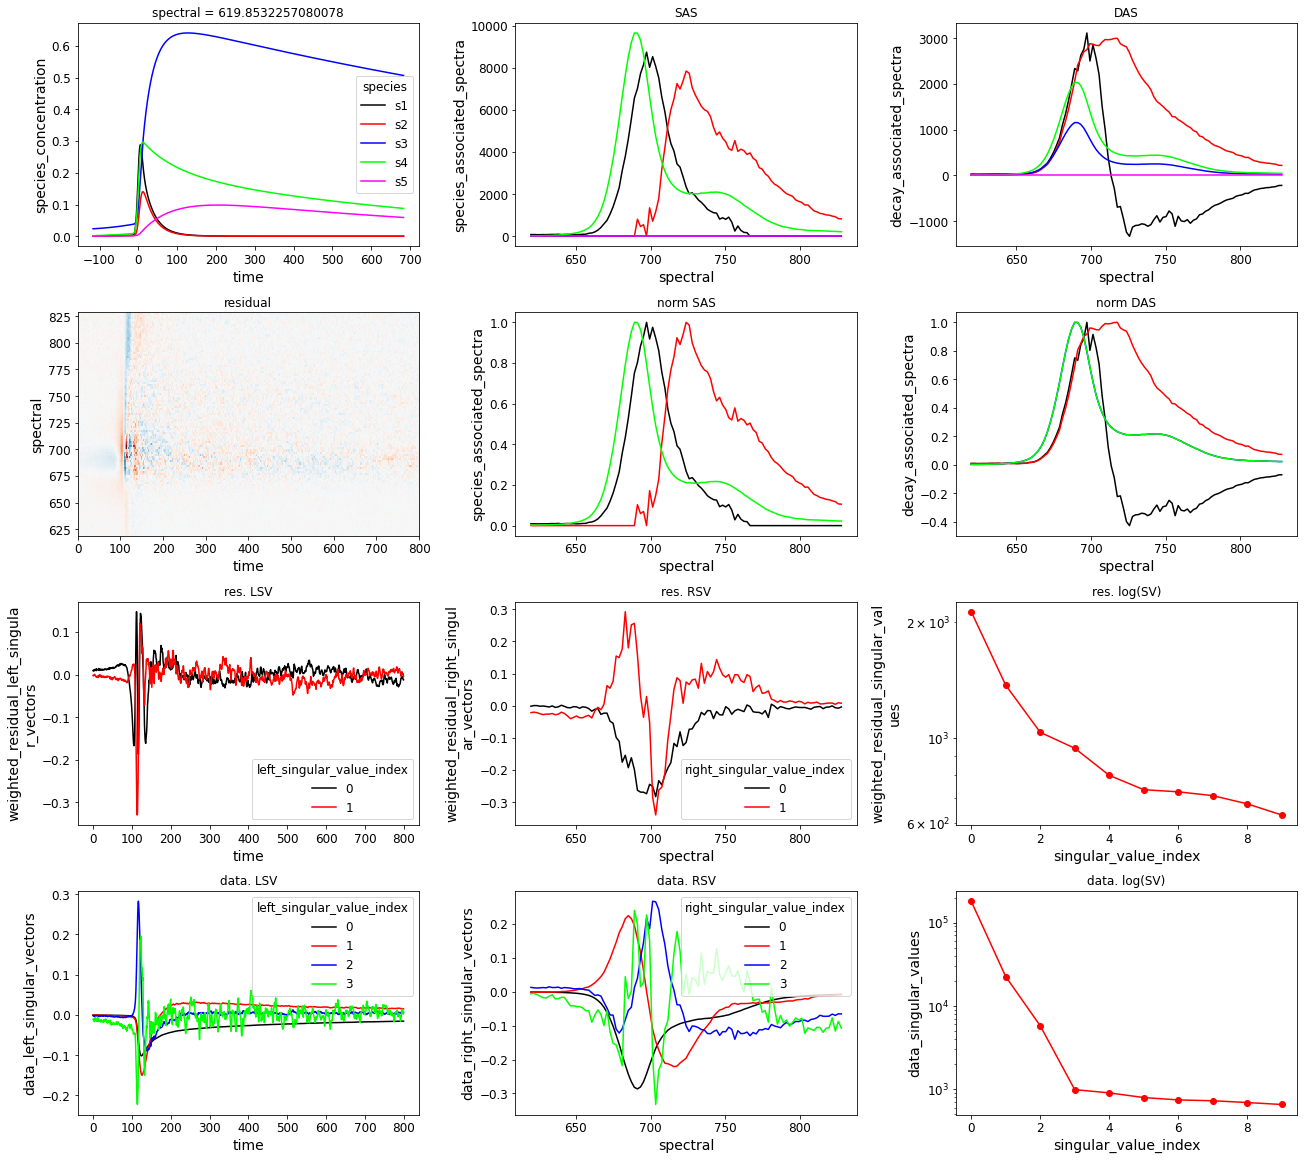

In [21]:
plot_overview(PAL_closed_target_result.data["dataset1"], linlog=False);

In [22]:
print_md(PAL_closed_target_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |      0.67 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |      0    |          0 |    -inf |     inf | False    | False            | None     |
    |         4 |      0.33 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf_1__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | width     |   4.66994 | 0.000300694 |    -inf |     inf | True     | False            | None     |
    | scale     |   1       | 0           |    -inf |     inf | False    | False            | None     |

  * __irf_2__:

    | _Label_   |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|-------------|---------|---------|----------|------------------|----------|
    | width     | 85.6555    | 0.0549365   |    -inf |     inf | True     | False            | None     |
    | scale     |  0.0779514 | 3.02861e-05 |    -inf |     inf | True     | False            | None     |

  * __irf_common__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | center    |   116.663 | 0.000349813 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13800     | 0           |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_                  |
    |-----------|------------|-------------|---------|---------|----------|------------------|-------------------------|
    |         1 | 0.087      | 0           |    -inf |     inf | False    | False            | None                    |
    |       1_1 | 0.1392     | 0           |    -inf |     inf | False    | False            | $kinetic.1 * $scaling.1 |
    |         2 | 0.0005     | 0           |    -inf |     inf | False    | False            | None                    |
    |         3 | 0.066      | 0           |    -inf |     inf | False    | False            | None                    |
    |         4 | 0.00492813 | 2.26669e-06 |    -inf |     inf | True     | False            | None                    |
    |       4_2 | 0.00613637 | 0           |    -inf |     inf | False    | False            | $kinetic.4 * $scaling.2 |
    |         5 | 0.00244356 | 5.1208e-07  |    -inf |     inf | True     | False            | None                    |

  * __scaling__:

    |   _Label_ |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    |         1 |   1.6     | 0           |    -inf |     inf | False    | False            | None     |
    |         2 |   1.24517 | 0.000233259 |    -inf |     inf | True     | False            | None     |

